In [1]:
import matplotlib.pyplot as plt  
import numpy as np
from sklearn import datasets,decomposition,manifold
import sklearn.neighbors as nb
import struct
import mnist
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline


In [2]:
def LLE(data, k, d):
    '''
    data is the original data. m*n(m=samples, n=dimensions)
    '''
    print("data dimensional reducing")
    print("computing weights")
    data = np.matrix(data)
   
    N = data.shape[0]
    D = data.shape[1]
    # step 1
    # find the nearest neighbors (k). Here we get the distance from (x-y)^2
    # distance
    data_tmp = np.sum(np.multiply(data, data), axis=1)
    distance=np.mat(data_tmp + data_tmp.T - 2*data*data.T)
    
    sort_index = np.argsort(distance,axis=1)

    # k nearest neibors
    neibors = sort_index[:,1:k+1]

    # step 2
    # weights
    
    W = np.zeros((N, N))
    
    # Gram Matrix
    
    if(k > D):
        add = 0.001
    else:
        add = 0
    
    for i in range(N):
        neibors_i = neibors[i].A[0]
        G = data[neibors_i[:]] - data[i] 
        G = np.dot(G, G.T)
        G = G + add * np.dot(np.eye(k), np.trace(G))
        G_I = np.linalg.inv(G)
        w_i = np.sum(G_I,axis=1) / np.sum(G_I)
        w_i = w_i.flatten([0])    
        W[i][neibors[i]]=w_i
    
    # Step 3
    # M 
    
    print("computing M")
    M=np.eye(N) - W
    M=np.dot(M.T, M)
    print("computing eig")
    eig_values, eig_vectors = np.linalg.eig(M)
    
    eig_index = np.argsort(eig_values)
    eig_index = eig_index[1:d+1]
    output = np.mat(eig_vectors[:,eig_index])
    print("reduction done")
    return output



testing data loading
testing data loaded
data dimensional reducing
computing weights
computing M
computing eig
reduction done
drawing


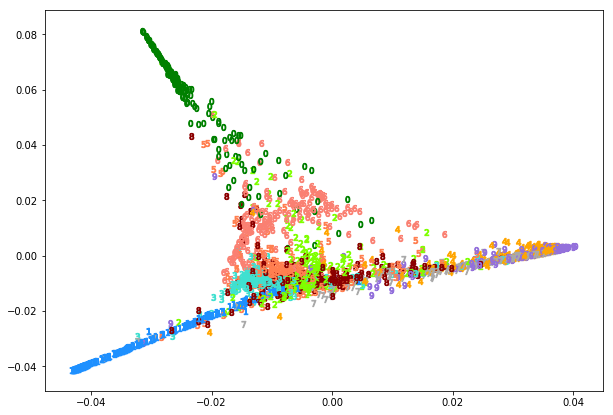

In [3]:
data, labels = mnist.load_mnist_testing(2000)
low_data= LLE(data, 8, 2)

print("drawing")
fig = plt.figure(figsize=(10,7))
plotwindow = fig.add_subplot(111)
a = np.array(low_data)

# draw the scatters
color = ['green','dodgerblue','chartreuse','turquoise','orange','coral','salmon','darkgray','darkred','mediumpurple']
marker = ["$0$","$1$","$2$","$3$","$4$","$5$","$6$","$7$","$8$","$9$"]
for j in range(len(low_data)):
    plt.scatter(a[j][0], a[j][1],s=40, c=color[labels[j]],marker=marker[labels[j]])
plt.show()

In [ ]:
def lle_mnist_knn(n_neighbor, n_dimension, data, labels):

    low_data= LLE(data, n_neighbor, n_dimension)

    print("KNN training")
    knn = nb.KNeighborsClassifier(n_neighbors = 1)  
    knn.fit(low_data[:500], labels[:500])

    s = knn.score(low_data[500:1000], labels[500:1000])
    print("KNN score",s)
    return s

In [ ]:
data, labels = mnist.load_mnist_training(1000)
for i in range(2,20):
    print("k, d",10,i)
    lle_mnist_knn(10,i,data,labels)

training data loading
training data loaded
k, d 10 2
data dimensional reducing
computing weights
computing M
computing eig
reduction done
KNN training
KNN score 0.566
k, d 10 3
data dimensional reducing
computing weights
computing M
computing eig
